In [1]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as cmap
import seaborn as sns
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("EastWestAirlines.csv")

Insights :

.read_csv is a function of pandas library.

we use .read_csv function to read the csv files.m

Import csv file and convert it to a DataFrame object

In [3]:
df.head()  # use .head to see first 5 element of DataFrame

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Insights :

-  .head() function is use to see first 5 elements of the data frame 

-  we can get just some idea about data by using .head() function like how many colums we have and how data is string or numeric etc.

In [4]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

Insights :

-  To see Column name we use .columns function

In [5]:
df.drop(['ID#'],axis=1,inplace=True)

Insights :

-  Here we are droping ID column which is not use ful in current case.

In [6]:
df.shape # using .shape for knowing the rows n colloumns 

(3999, 11)

Insights :

-  .shape function use to see the shape of the data frame like how many rows and columns its contain 

-  its also shows the data is one dimensional or two dimensional


In [7]:
df.info() # .info() shows the columns names how any rows are non-null and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


Insights :

-  .info() function is use to see data type of the columns.

-  to see how many rows contains value means not null 

In [8]:
df.describe() # .describe use to calculate the some statistical data 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


Insights :

-  .describe() function is statistical funtion

-  To see some mathematical operation on data frame. it is perfom mathematical operation only on numerical data like the columns which contains numeric data. 

In [9]:
df.dtypes  # to see data types 

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
df.count() # to see count

Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64

In [11]:
#To see sum of the NA values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Insights :

-  .isnull() function to see the null data present in the data frame

-  we use .sum() function after .isnull() for taking sum of the null values (how many rows contains null values)

# Visualization of Data Frame 

Balance


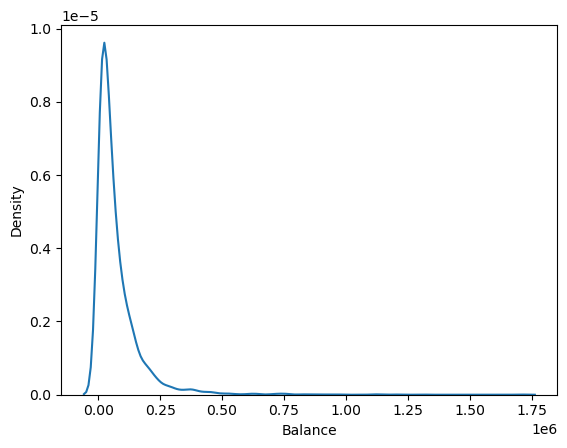

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Qual_miles


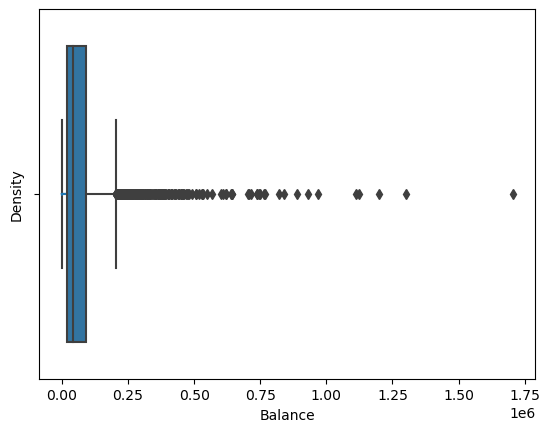

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc1_miles


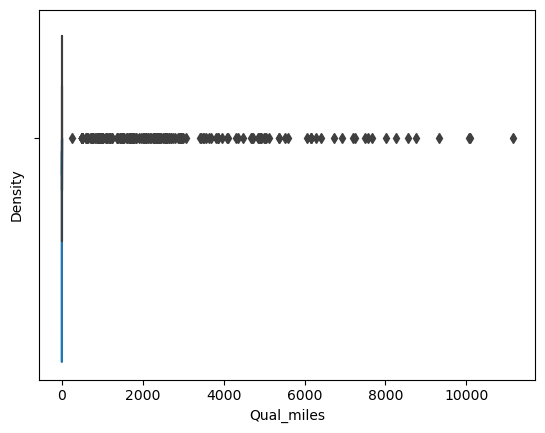

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc2_miles


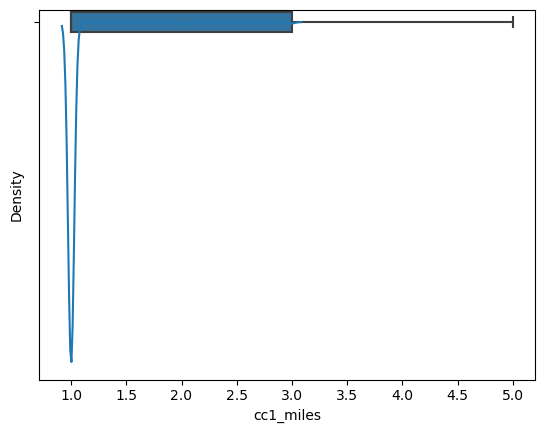

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc3_miles


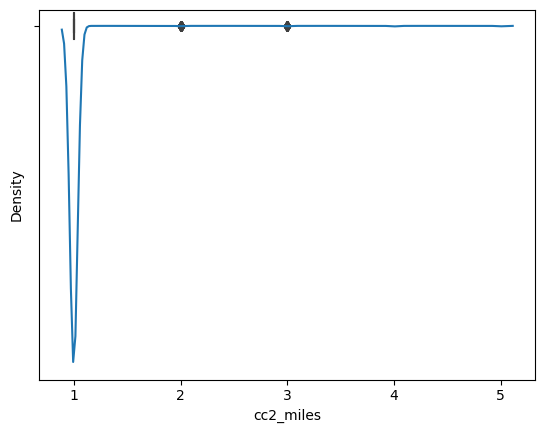

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Bonus_miles


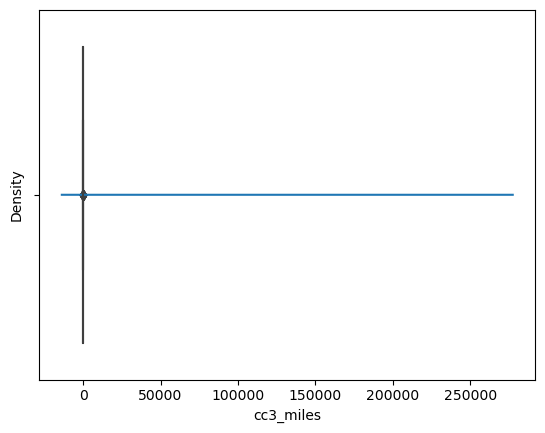

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Bonus_trans


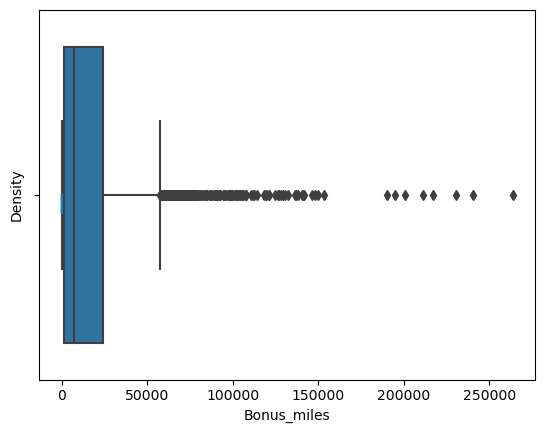

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Flight_miles_12mo


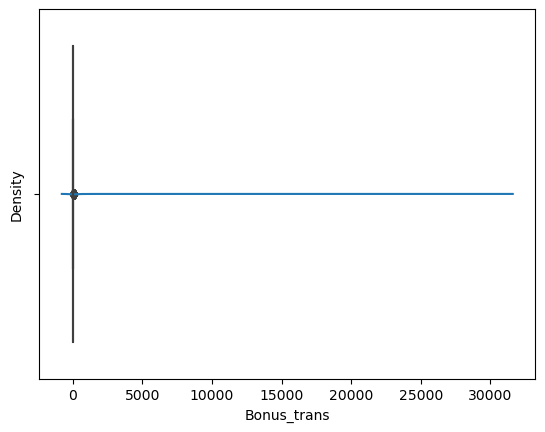

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Flight_trans_12


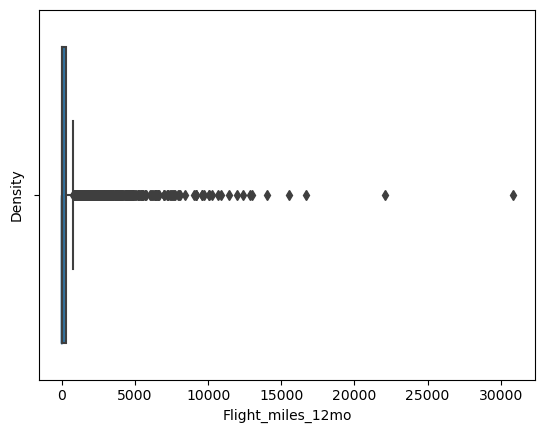

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Days_since_enroll


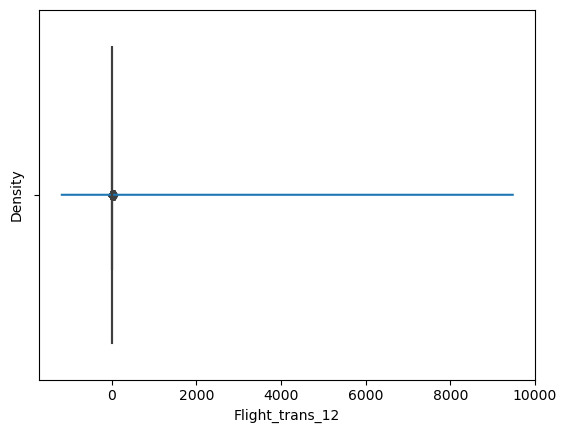

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Award?


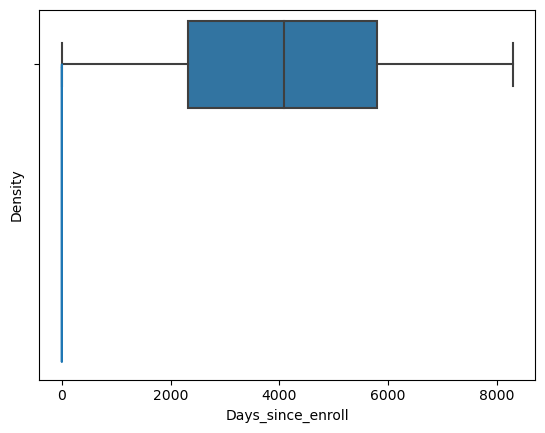

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


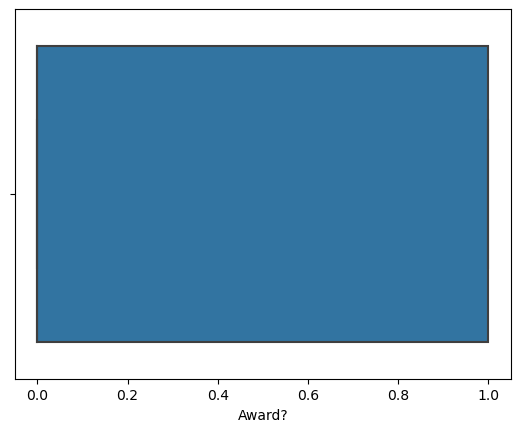

In [12]:
for i in df.columns:
    print(i)
    sns.kdeplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show

<AxesSubplot:>

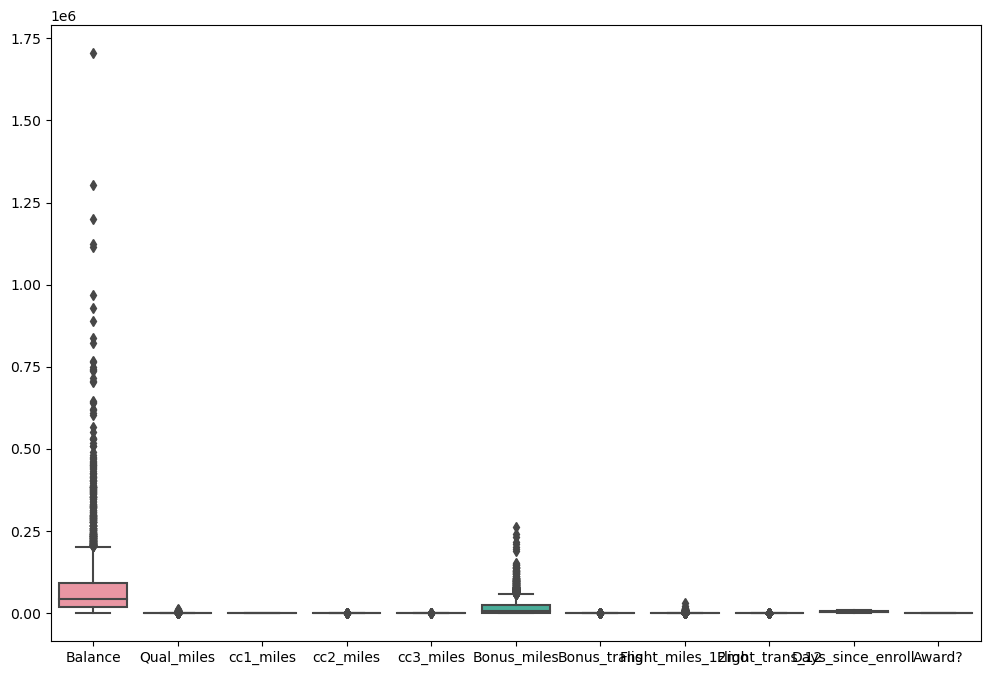

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

Insights :

-  Ploting a common boxplot to see the outliers

-  From above boxplot we can clearly see that our data framecontains as outliers

<AxesSubplot:>

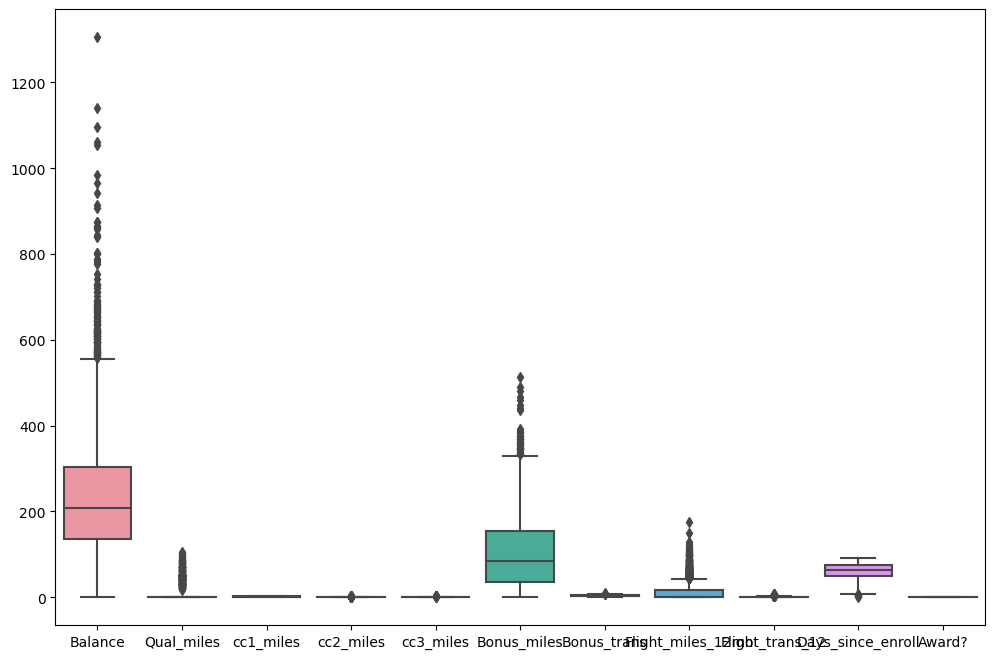

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

Insights : 

-  By doing transformation we are trying to remove outliers.

In [15]:
np.sqrt(df).isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Insights :

-  Checking our transformation contains null value or not.

In [16]:
q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)
df1 = df[(df['Balance']>ll)&(df['Balance']<ul)]

In [17]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

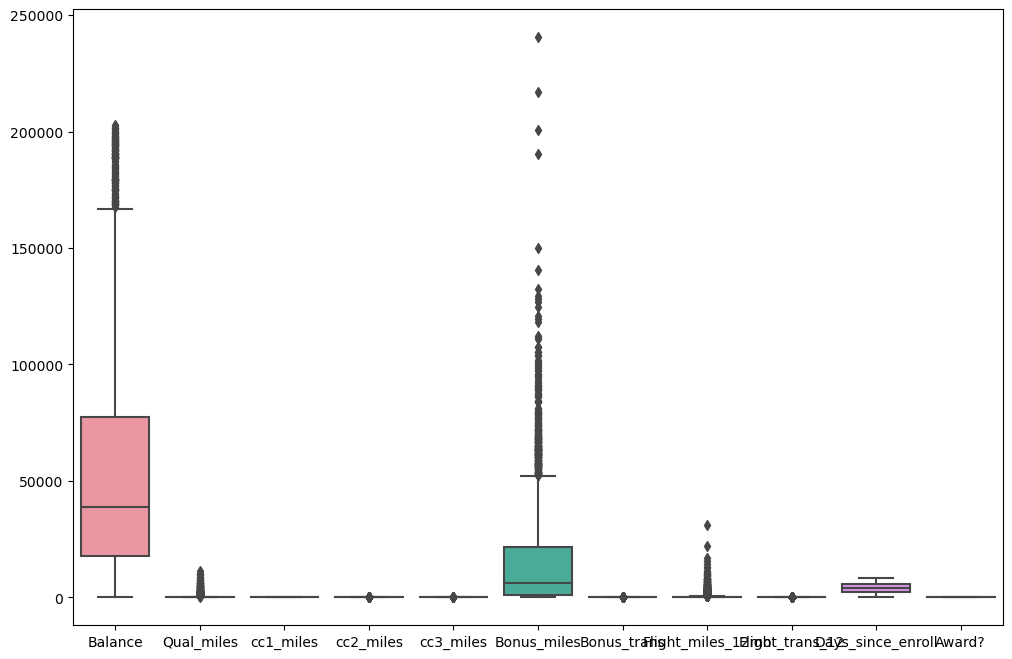

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

In [19]:
df.shape

(3999, 11)

In [20]:
df1.shape

(3733, 11)

In [21]:
q1 = df['Bonus_miles'].quantile(0.25)
q3 = df['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)
df2 = df[(df['Bonus_miles']>ll)&(df['Bonus_miles']<ul)]

Insights :

-  We are removing the outliers containing in Bonus_miles

<AxesSubplot:>

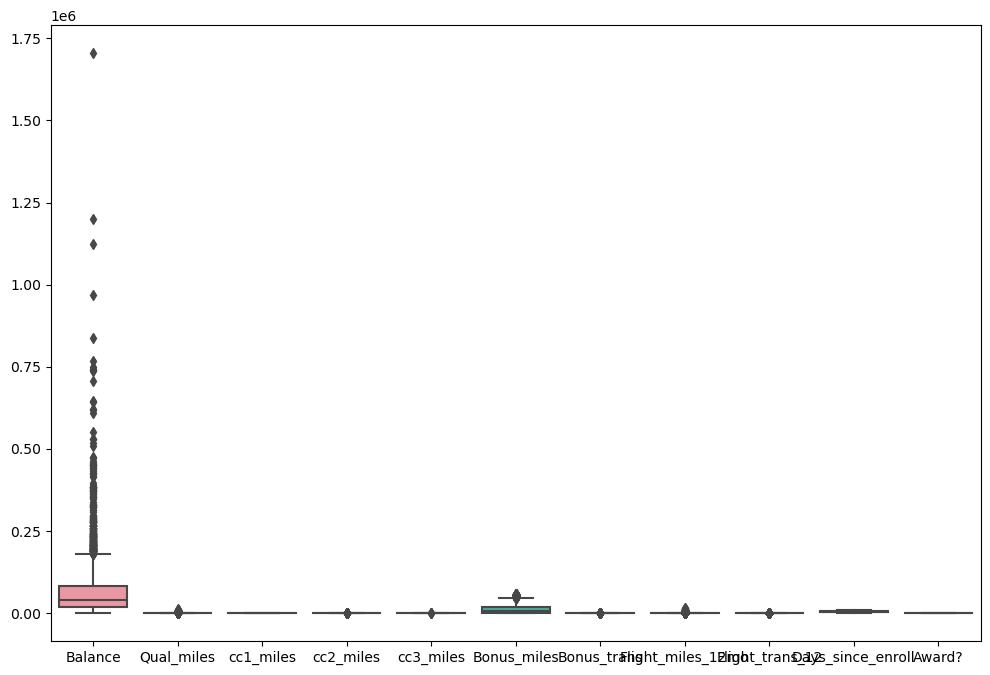

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

Insights :

-  In the above diagram we can clearly see that Balance contains most outliers, which can be influential while building a model, so we can not remove them.

In [23]:
df2.shape

(3719, 11)

we need to normalize the data 

Balance


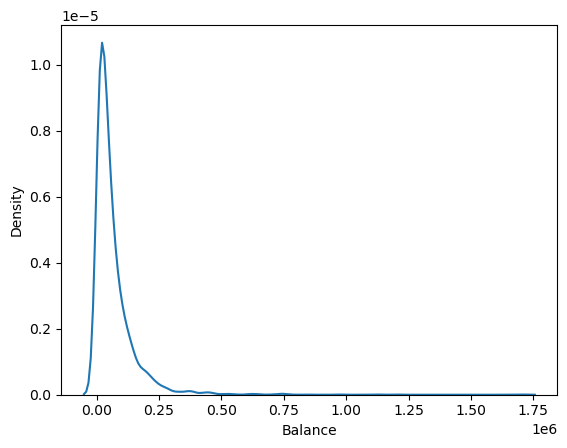

Qual_miles


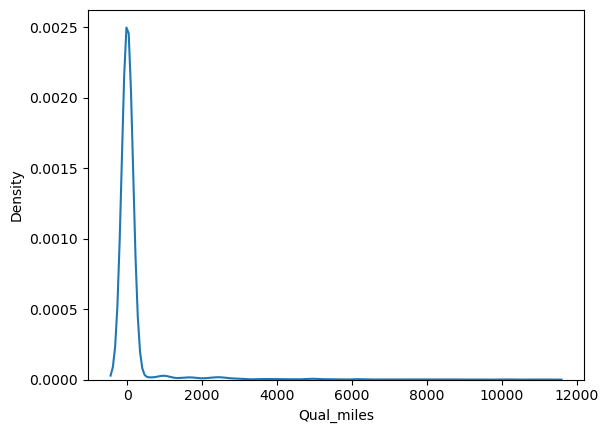

cc1_miles


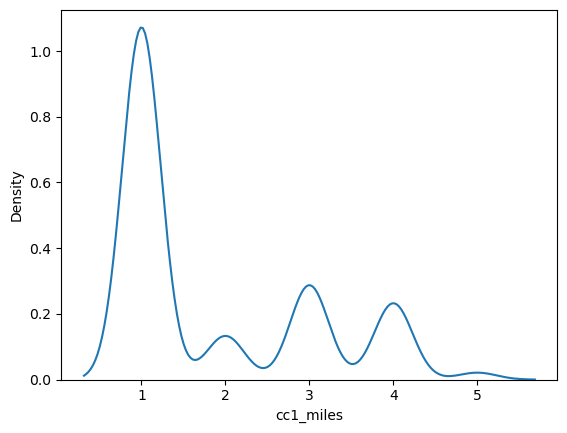

cc2_miles


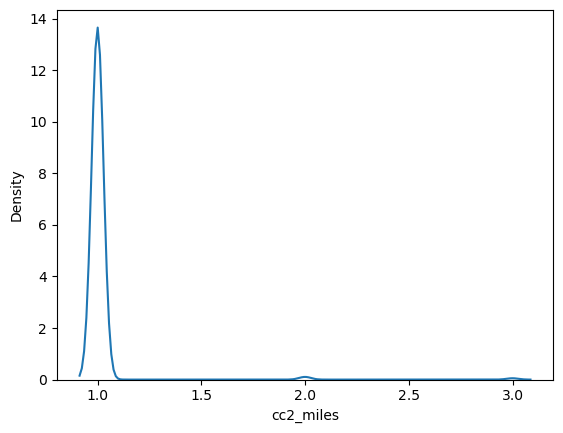

cc3_miles


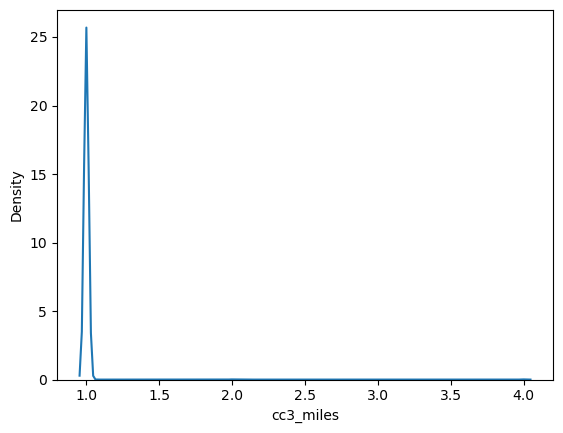

Bonus_miles


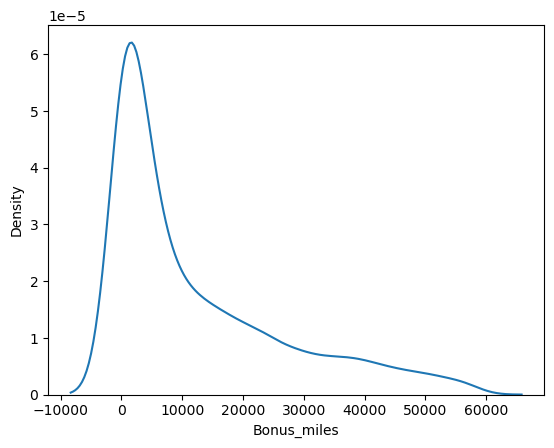

Bonus_trans


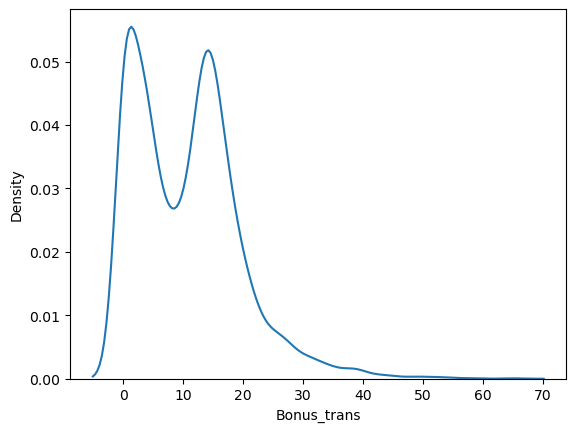

Flight_miles_12mo


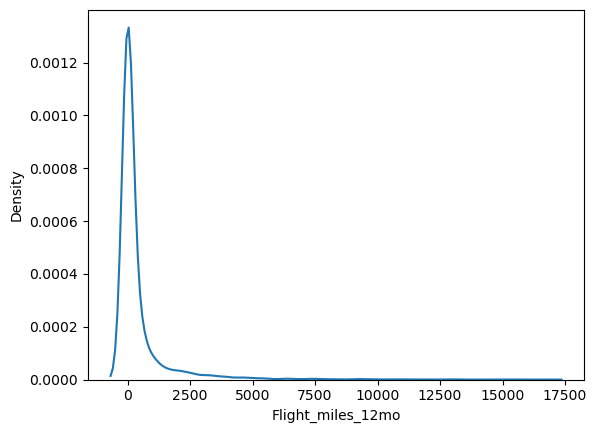

Flight_trans_12


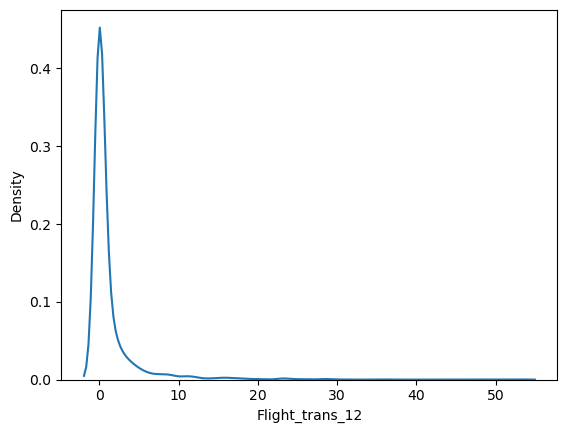

Days_since_enroll


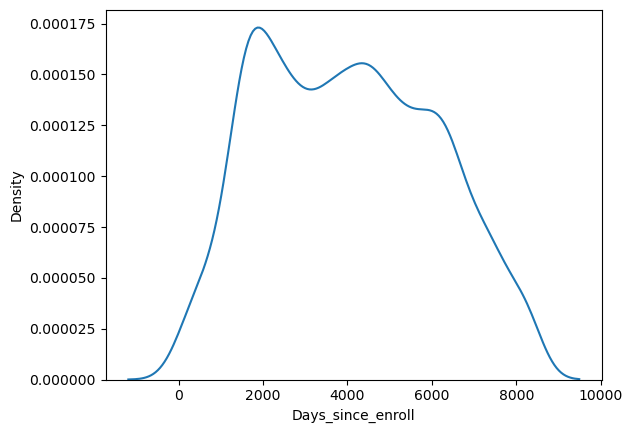

Award?


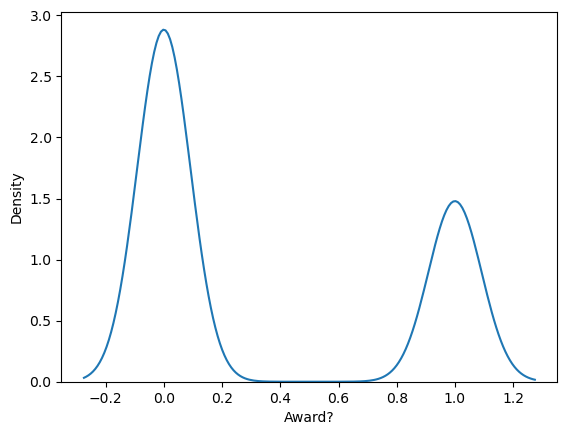

In [24]:
for i in df2.columns:
    print(i)
    sns.kdeplot(df2[i])
    plt.show()

Insights :

-  As we can see that our most of the data is skewed at left side, so we have to do normalization ontat.

In [25]:
df2.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.105455,0.253815,-0.002868,0.080966,0.321949,0.290960,0.242205,0.274020,0.243774,0.138676
Qual_miles,0.105455,1.000000,-0.004871,-0.013387,0.004247,0.023640,0.042977,0.131087,0.143886,0.015229,0.096443
cc1_miles,0.253815,-0.004871,1.000000,-0.063507,0.001333,0.883924,0.572009,-0.029778,-0.031186,0.178303,0.263928
cc2_miles,-0.002868,-0.013387,-0.063507,1.000000,-0.003372,0.014184,0.079037,0.015119,0.027236,-0.002152,0.007643
cc3_miles,0.080966,0.004247,0.001333,-0.003372,1.000000,0.071646,0.052099,0.020036,0.026703,0.012918,-0.009839
Bonus_miles,0.321949,0.023640,0.883924,0.014184,0.071646,1.000000,0.622151,0.113363,0.104449,0.164201,0.334572
Bonus_trans,0.290960,0.042977,0.572009,0.079037,0.052099,0.622151,1.000000,0.299963,0.365701,0.138082,0.288832
Flight_miles_12mo,0.242205,0.131087,-0.029778,0.015119,0.020036,0.113363,0.299963,1.000000,0.850740,0.041861,0.212915
Flight_trans_12,0.274020,0.143886,-0.031186,0.027236,0.026703,0.104449,0.365701,0.850740,1.000000,0.058367,0.237960
Days_since_enroll,0.243774,0.015229,0.178303,-0.002152,0.012918,0.164201,0.138082,0.041861,0.058367,1.000000,0.160690


<AxesSubplot:>

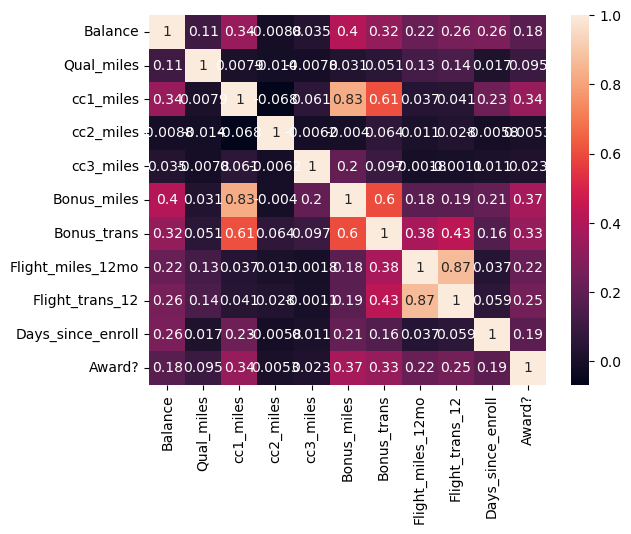

In [26]:
sns.heatmap(df.corr(),annot=True)

Insights :

-  .corr() means corelaton how data is corelated to each other

-  we have to see how our data is corelated and remove the highly corelated data.

-  With the help sns.heat(corr) we visualize the corelation between the features

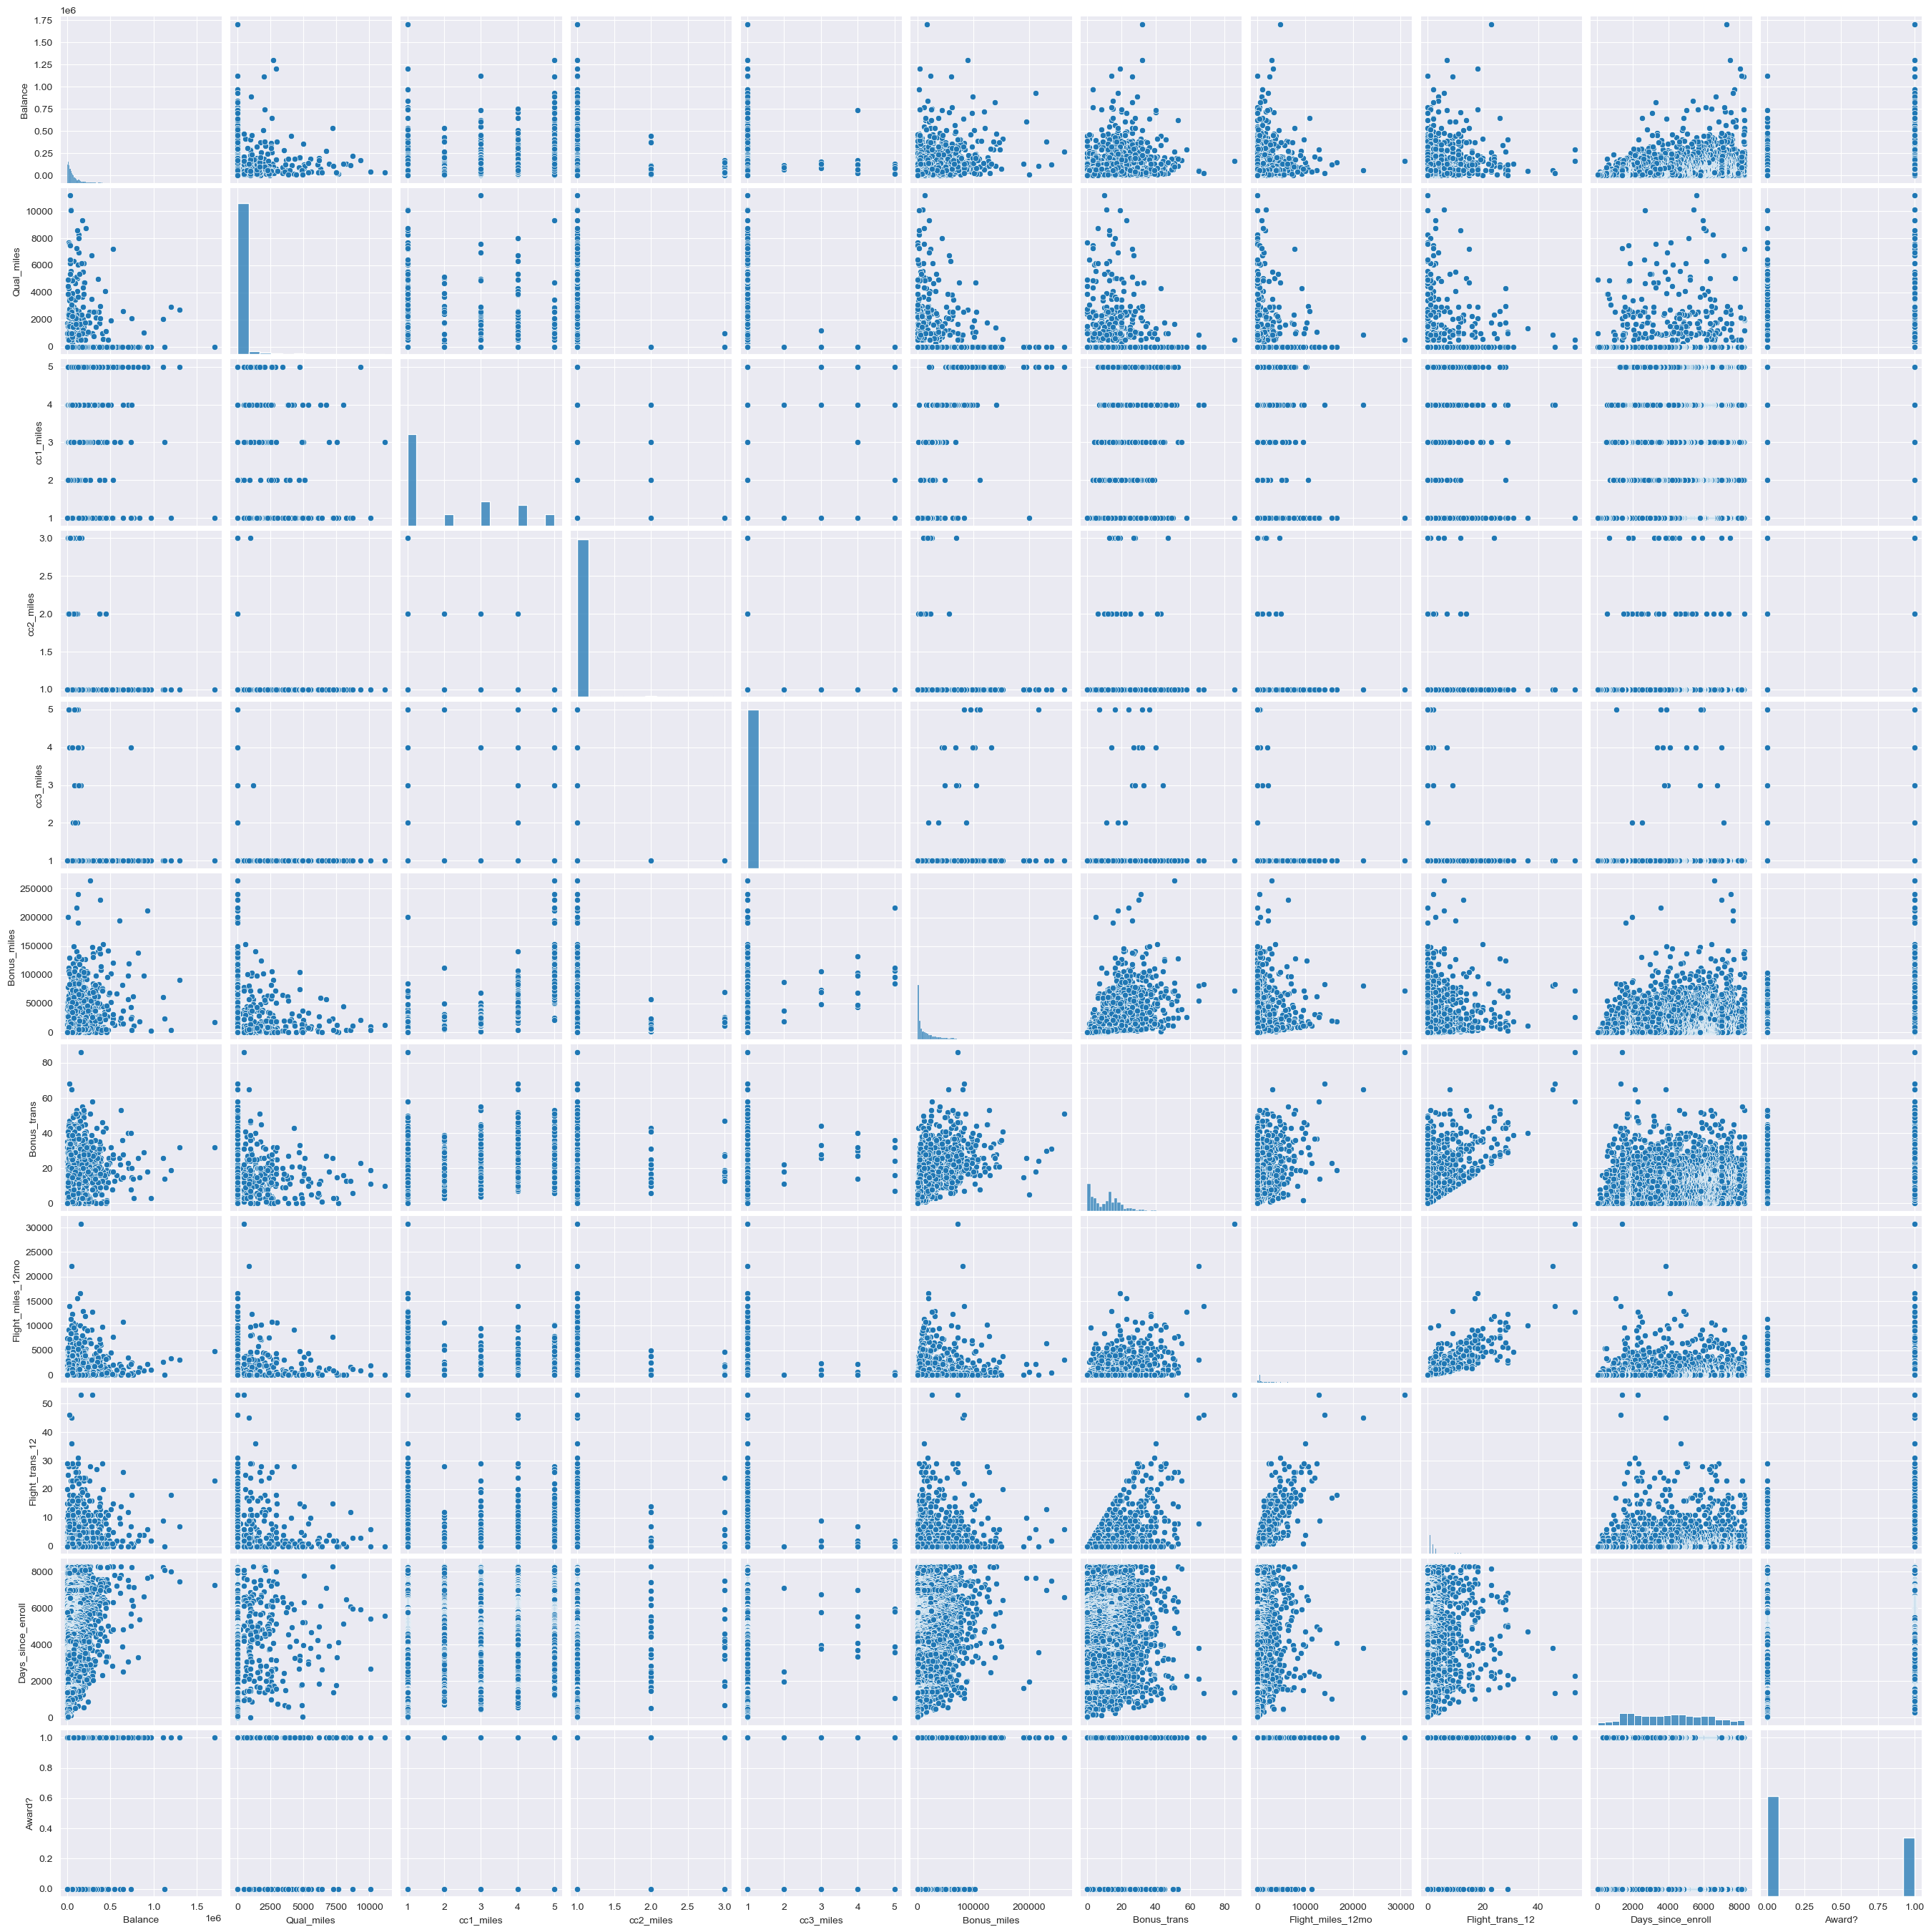

In [27]:
#Format the plot background and scatter plots for all the variables
#cheking is corelation between features by pairplot
sns.set_style(style='darkgrid')
sns.pairplot(df)

Insights :

-  Here we are creating a function which is normalization function and the main goal of this functon is to transform features to be on a similiar scale.

In [28]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df2)

Hierarchical Clustering

Insights :

-  Creating Dendrogram and dendrogram is a diagram that shows hierarchical relationship between objects.

-  The main use of a dendrogram is to work out the best way to allocate objects to clusters

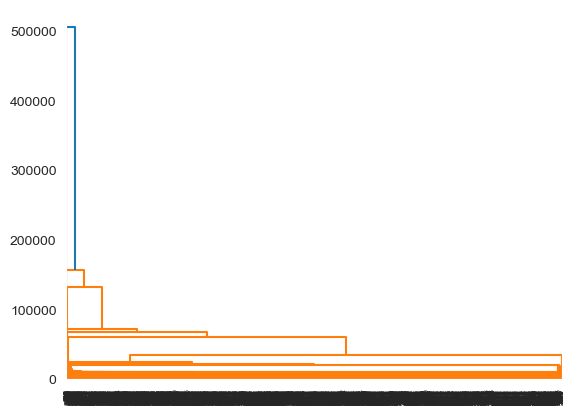

In [29]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df2, method='single'))

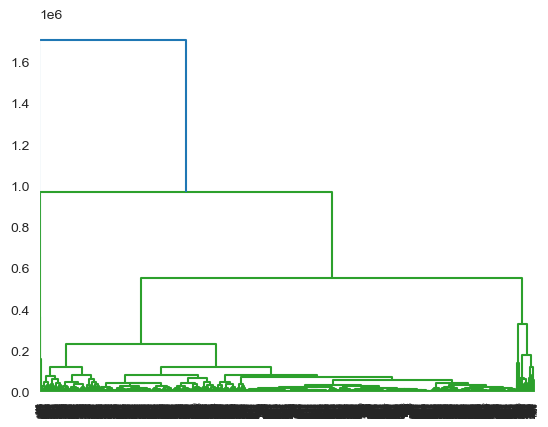

In [30]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df2, method='complete'))

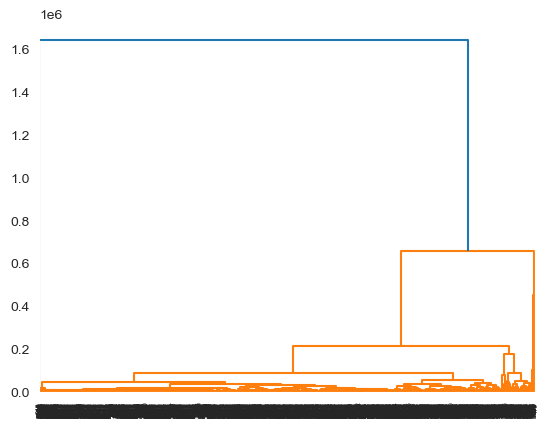

In [31]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df2, method='average'))

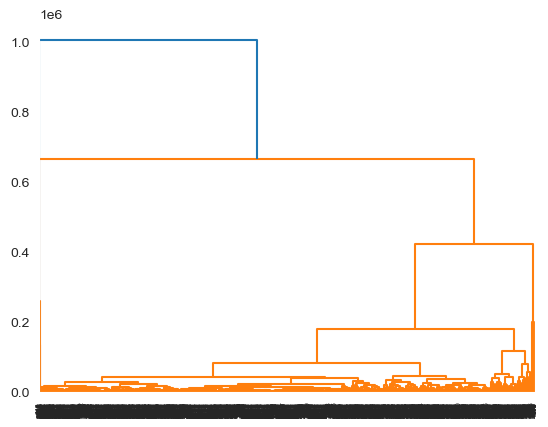

In [32]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df2, method='weighted'))

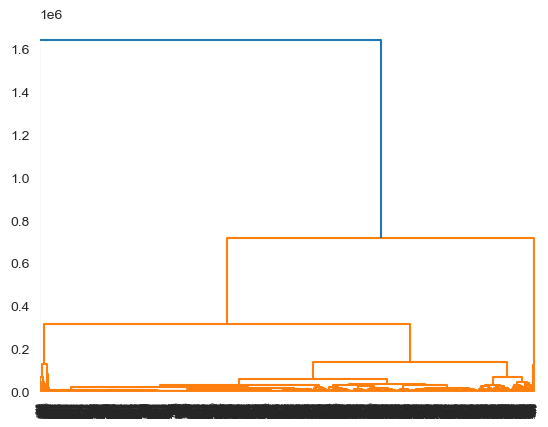

In [33]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df2, method='centroid'))

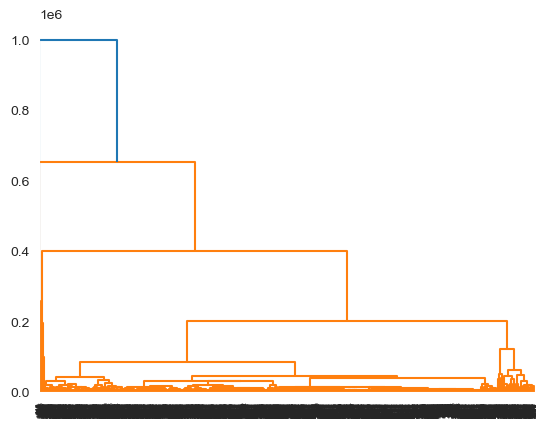

In [34]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df2, method='median'))

Insights : 

-  In above we can see different diagrams of a dendrograms with different methods. 

-  On the above dendrogram besis we can say that the method -'Complete' use in the dendrogram is little bit look perfect in visualization

In [35]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

Insights :

-  Agglomerative Clustering is a type of hierarchical clustering algorithm.

-  It's divides the data points into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar

In [36]:
df2.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [37]:
df_val = df2.values

In [38]:
hc.fit(df_val)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [39]:
y_hc=hc.labels_

In [40]:
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
df2['Clusters']=hc.labels_

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12436\2146363076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Clusters']=hc.labels_


Insights :

-  Assing clusters to the data frame (df)

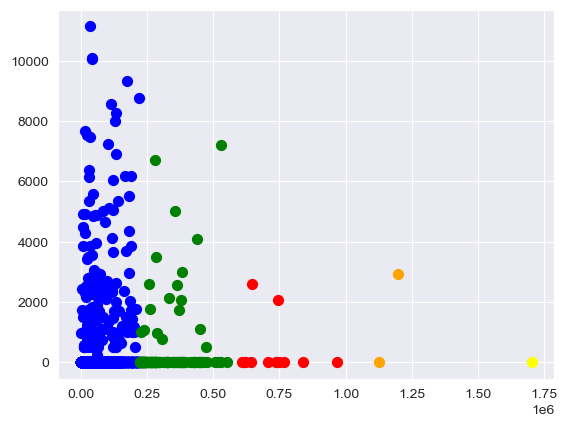

In [42]:
plt.scatter(df_val[y_hc==0,0],df_val[y_hc==0,1],s=50,marker='o',color='red')
plt.scatter(df_val[y_hc==1,0],df_val[y_hc==1,1],s=50,marker='o',color='blue')
plt.scatter(df_val[y_hc==2,0],df_val[y_hc==2,1],s=50,marker='o',color='green')
plt.scatter(df_val[y_hc==3,0],df_val[y_hc==3,1],s=50,marker='o',color='yellow')
plt.scatter(df_val[y_hc==4,0],df_val[y_hc==4,1],s=50,marker='o',color='ORANGE')
#plt.scatter(df_new[y_hc==5,0],df_new[y_hc==5,1],s=50,marker='o',color='black')
#plt.scatter(df_new[y_hc==6,0],df_new[y_hc==6,1],s=50,marker='o',color='purple')
#plt.scatter(df_new[y_hc==7,0],df_new[y_hc==7,1],s=50,marker='o',color='PINK')
plt.show()

Data Count in each Cluster 

Text(0.5, 1.0, 'Data counts in cluster')

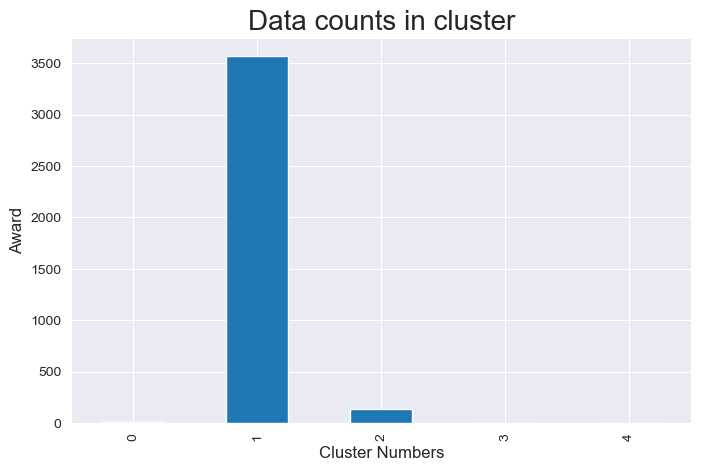

In [43]:
plt.figure(figsize=(8,5))
df2.groupby(df2['Clusters']).count()['Award?'].plot(kind='bar')
plt.xlabel('Cluster Numbers',size=12)
plt.ylabel('Award',size=12)
plt.title('Data counts in cluster',size=20)

KMEANS

In [44]:
# Importing library for KMeans
from sklearn.cluster import KMeans

In [45]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(df2)

KMeans(n_clusters=5, random_state=42)

In [46]:
clusters_new.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [47]:
kmean_cluster = clusters_new.labels_

In [48]:
#Assign clusters to the data set
df2['clusterid_new'] = clusters_new.labels_

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12436\1460918696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusterid_new'] = clusters_new.labels_


In [49]:
df2.head()  # use .head to see first 5 element of DataFrame

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1,2
1,19244,0,1,1,1,215,2,0,0,6968,0,1,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,2
3,14776,0,1,1,1,500,1,0,0,6952,0,1,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [50]:
#these are standardized values.
clusters_new.cluster_centers_

array([[8.78782745e+04, 1.61754212e+02, 2.45688801e+00, 1.00792864e+00,
        1.00693756e+00, 1.94306660e+04, 1.39365709e+01, 5.14453915e+02,
        1.56590684e+00, 4.35323389e+03, 3.66699703e-01, 1.00000000e+00],
       [4.16072033e+05, 5.38229508e+02, 2.39344262e+00, 1.04918033e+00,
        1.00000000e+00, 2.32411148e+04, 1.63770492e+01, 1.44739344e+03,
        4.36065574e+00, 5.70406557e+03, 6.55737705e-01, 1.83606557e+00],
       [2.38384381e+04, 9.70386788e+01, 1.47240330e+00, 1.01781834e+00,
        1.00000000e+00, 7.12690439e+03, 8.22903086e+00, 2.25713168e+02,
        7.06649283e-01, 3.69574402e+03, 2.99000435e-01, 1.00000000e+00],
       [1.94423401e+05, 2.68560831e+02, 2.54302671e+00, 1.01186944e+00,
        1.00000000e+00, 2.32584065e+04, 1.60000000e+01, 1.02762611e+03,
        2.83382789e+00, 4.98340356e+03, 4.56973294e-01, 1.23738872e+00],
       [9.34444364e+05, 4.53181818e+02, 1.90909091e+00, 1.00000000e+00,
        1.27272727e+00, 2.10747273e+04, 1.90000000e+01, 1.76

In [51]:
df2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,87781.588933,161.274704,2.455534,1.007905,1.006917,19422.181818,13.944664,515.409091,1.565217,4359.958498,0.366601,1.000000
1,1,416072.032787,538.229508,2.393443,1.049180,1.000000,23241.114754,16.377049,1447.393443,4.360656,5704.065574,0.655738,1.836066
2,2,23797.413838,97.165361,1.471715,1.017842,1.000000,7114.578329,8.218016,224.915579,0.705831,3691.924282,0.298956,1.000000
3,3,194423.400593,268.560831,2.543027,1.011869,1.000000,23258.406528,16.000000,1027.626113,2.833828,4983.403561,0.456973,1.237389
4,4,934444.363636,453.181818,1.909091,1.000000,1.272727,21074.727273,19.000000,1767.545455,7.909091,6959.272727,0.818182,1.000000


Visualisation of KMEANS cluster

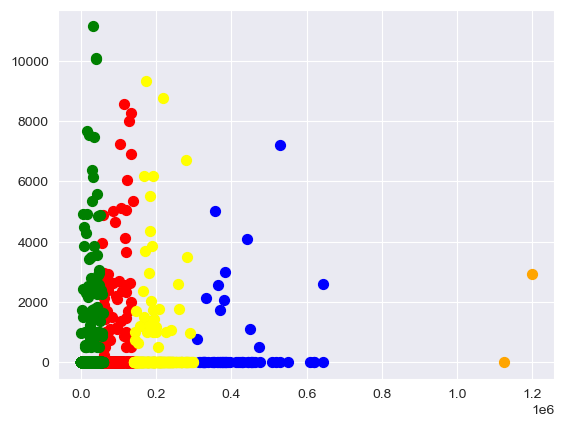

In [52]:
plt.scatter(df_val[kmean_cluster==0,0],df_val[kmean_cluster==0,1],s=50,marker='o',color='red')
plt.scatter(df_val[kmean_cluster==1,0],df_val[kmean_cluster==1,1],s=50,marker='o',color='blue')
plt.scatter(df_val[kmean_cluster==2,0],df_val[kmean_cluster==2,1],s=50,marker='o',color='green')
plt.scatter(df_val[kmean_cluster==3,0],df_val[kmean_cluster==3,1],s=50,marker='o',color='yellow')
plt.scatter(df_val[y_hc==4,0],df_val[y_hc==4,1],s=50,marker='o',color='ORANGE')
#plt.scatter(df_new[y_hc==5,0],df_new[y_hc==5,1],s=50,marker='o',color='black')
#plt.scatter(df_new[y_hc==6,0],df_new[y_hc==6,1],s=50,marker='o',color='purple')
#plt.scatter(df_new[y_hc==7,0],df_new[y_hc==7,1],s=50,marker='o',color='PINK')
plt.show()

Data count in KMEAN cluster

Text(0.5, 1.0, 'Data counts in cluster')

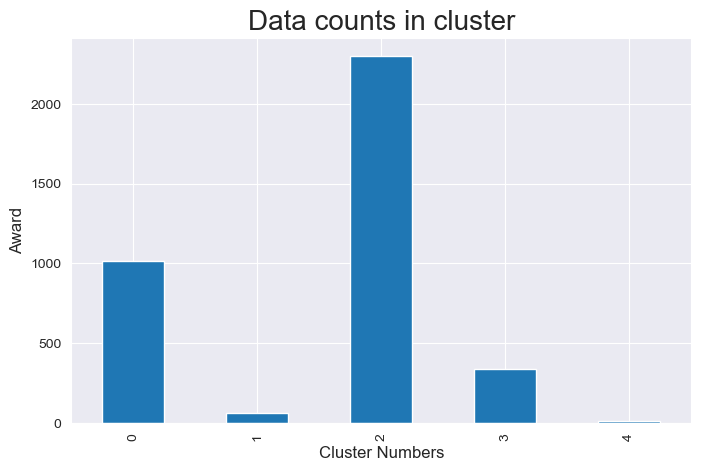

In [53]:
plt.figure(figsize=(8,5))
df2.groupby(df2['clusterid_new']).count()['Award?'].plot(kind='bar')
plt.xlabel('Cluster Numbers',size=12)
plt.ylabel('Award',size=12)
plt.title('Data counts in cluster',size=20)

DBSCAN clustering

In [54]:
#Import DBSCAN library
from sklearn.cluster import DBSCAN

In [55]:
dbscan = DBSCAN(eps=10000, min_samples=5)
dbscan.fit(df2)

DBSCAN(eps=10000)

In [56]:
#Noisy samples are given the label -1.
dbscan =dbscan.labels_

In [57]:
dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
df2['DBSCAN'] = dbscan

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12436\4149508904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DBSCAN'] = dbscan


Visualization of DBSCAN

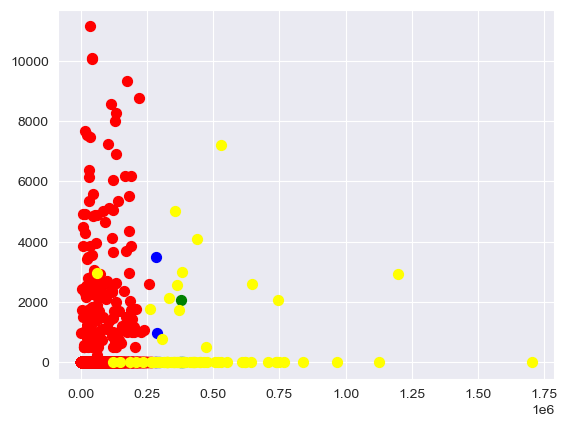

In [59]:
plt.scatter(df_val[dbscan==0,0],df_val[dbscan==0,1],s=50,marker='o',color='red')
plt.scatter(df_val[dbscan==1,0],df_val[dbscan==1,1],s=50,marker='o',color='blue')
plt.scatter(df_val[dbscan==2,0],df_val[dbscan==2,1],s=50,marker='o',color='green')
plt.scatter(df_val[dbscan==-1,0],df_val[dbscan==-1,1],s=50,marker='o',color='yellow')
#plt.scatter(df_val[y_hc==4,0],df_val[y_hc==4,1],s=50,marker='o',color='ORANGE')
#plt.scatter(df_new[y_hc==5,0],df_new[y_hc==5,1],s=50,marker='o',color='black')
#plt.scatter(df_new[y_hc==6,0],df_new[y_hc==6,1],s=50,marker='o',color='purple')
#plt.scatter(df_new[y_hc==7,0],df_new[y_hc==7,1],s=50,marker='o',color='PINK')
plt.show()

Text(0.5, 1.0, 'Data counts in DBSCAN')

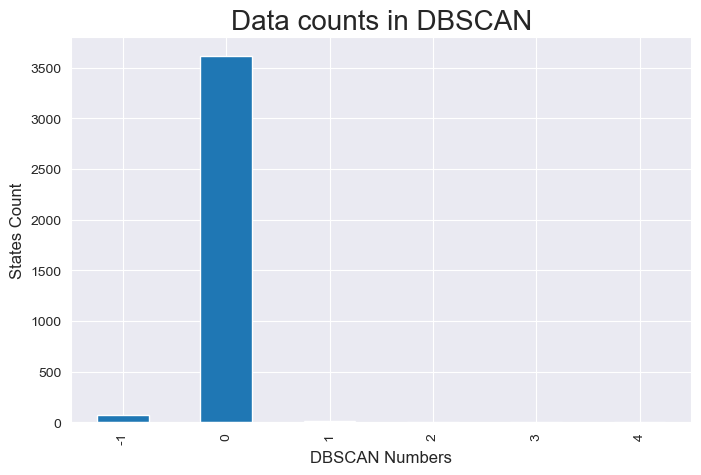

In [60]:
plt.figure(figsize=(8,5))
df2.groupby(df2['DBSCAN']).count()['Award?'].plot(kind='bar')
plt.xlabel('DBSCAN Numbers',size=12)
plt.ylabel('States Count',size=12)
plt.title('Data counts in DBSCAN',size=20)

Insights :

-  Here we are used KMEAN and DBSCAN clustering both are working same i.e. grouping the similers data points together but in KMEANS similirity is measured by using Eucliden Distance however in DBSCAN neighbourhood of each point in a cluster which is within a given radius must have minimum number of points.

-  we can use this types of cluster for filling NA values, filtering the null values and after that checking the near clusters and according to that taking mean/mod/median we can fill our NA data more accureatly while filling randomly mean/mode/median of all data.